# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings. 

Also you will learn what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** package. 

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with the Random Forest, Gradient Boosting Descent, KNN algorithms.

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind K-Means, Gradient Boosting Descent, KNN, Random Forest, and Confusion Matrices.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques. 

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Label Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. you are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. 

The purpose of clustering analysis is to cluster data with similar characteristics. You are asked to use the ***K-means*** algorithm to make cluster analysis. However, you must provide the K-means algorithm with information about the number of clusters it will make predictions. Also, the data you apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, you are asked to use the ***Elbow method***. Briefly, try to predict the set to which individuals are related by using K-means and evaluate the estimation results.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set. 

Try to make your predictions by using the algorithms ***Gradient Boosting Classifier***, ***K Neighbors Classifier***, ***Random Forest Classifier***. You can use the related modules of the ***scikit-learn*** library. You can use scikit-learn ***Confusion Metrics*** module for accuracy calculation. You can use the ***Yellowbrick*** module for model selection and visualization.

In the final step, you will deploy your model using Streamlit tool.



## 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [441]:
df = pd.read_csv("HR_Dataset.csv")
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

  Departments   salary  
0        sales     low  
1        sales  medium  
2        sales  medium  
3        sales     low  
4        sales     low

In [442]:
sorted(df["Departments "].unique())

['IT',
 'RandD',
 'accounting',
 'hr',
 'management',
 'marketing',
 'product_mng',
 'sales',
 'support',
 'technical']

In [430]:
df1 = df.copy()

In [431]:
df.isnull().sum()

satisfaction_level          0
last_evaluation             0
number_project              0
average_montly_hours        0
time_spend_company          0
Work_accident               0
left                        0
promotion_last_5years       0
salary                      0
Departments _IT             0
Departments _RandD          0
Departments _accounting     0
Departments _hr             0
Departments _management     0
Departments _marketing      0
Departments _product_mng    0
Departments _sales          0
Departments _support        0
Departments _technical      0
dtype: int64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   satisfaction_level        14999 non-null  float64
 1   last_evaluation           14999 non-null  float64
 2   number_project            14999 non-null  float64
 3   average_montly_hours      14999 non-null  float64
 4   time_spend_company        14999 non-null  float64
 5   Work_accident             14999 non-null  int64  
 6   left                      14999 non-null  int64  
 7   promotion_last_5years     14999 non-null  int64  
 8   salary                    14999 non-null  int64  
 9   Departments _IT           14999 non-null  uint8  
 10  Departments _RandD        14999 non-null  uint8  
 11  Departments _accounting   14999 non-null  uint8  
 12  Departments _hr           14999 non-null  uint8  
 13  Departments _management   14999 non-null  uint8  
 14  Depart

In [4]:
df.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [5]:
for col in df.iloc[:,:8]:
    for counter in range(len(df["left"].unique())):
        
        Q1 = df[df["left"]==counter][col].quantile(0.25)
        Q3 = df[df["left"]==counter][col].quantile(0.75)
        IQR = Q3-Q1
        lower_lim = Q1-1.5*IQR
        upper_lim = Q3+1.5*IQR
        print(f" count of outlier in {col} column by left {counter}= {df[df['left']==counter][(df[df['left']==counter][col] < lower_lim) | (df[df['left']==counter][col] > upper_lim)][col].count()} ")
    print()

 count of outlier in satisfaction_level column by left 0= 0 
 count of outlier in satisfaction_level column by left 1= 0 

 count of outlier in last_evaluation column by left 0= 0 
 count of outlier in last_evaluation column by left 1= 0 

 count of outlier in number_project column by left 0= 519 
 count of outlier in number_project column by left 1= 0 

 count of outlier in average_montly_hours column by left 0= 0 
 count of outlier in average_montly_hours column by left 1= 0 

 count of outlier in time_spend_company column by left 0= 376 
 count of outlier in time_spend_company column by left 1= 0 

 count of outlier in Work_accident column by left 0= 2000 
 count of outlier in Work_accident column by left 1= 169 

 count of outlier in left column by left 0= 0 
 count of outlier in left column by left 1= 0 

 count of outlier in promotion_last_5years column by left 0= 300 
 count of outlier in promotion_last_5years column by left 1= 19 



In [6]:
df._get_numeric_data()

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  
...                      ...  
14994                      0  
14995                      0  
14996                      0  
14997                      0  
14998                      0  

[14999 rows x 8 columns]

In [7]:
df["Departments "].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [8]:
df["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [9]:
"""from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df["salary"] = labelencoder.fit_transform(df["salary"])"""

'from sklearn.preprocessing import LabelEncoder\nlabelencoder = LabelEncoder()\ndf["salary"] = labelencoder.fit_transform(df["salary"])'

### Data Insights

In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. Here, you can find the average of both the groups using groupby() and mean() function.

In [10]:
df.groupby("left").mean()

satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0               199.060203            3.380032       0.175009   
1               207.419210            3.876505       0.047326   

      promotion_last_5years  
left                         
0                  0.026251  
1                  0.005321

## 2. Data Visualization

You can search for answers to the following questions using data visualization methods. Based on these responses, you can develop comments about the factors that cause churn.
- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?

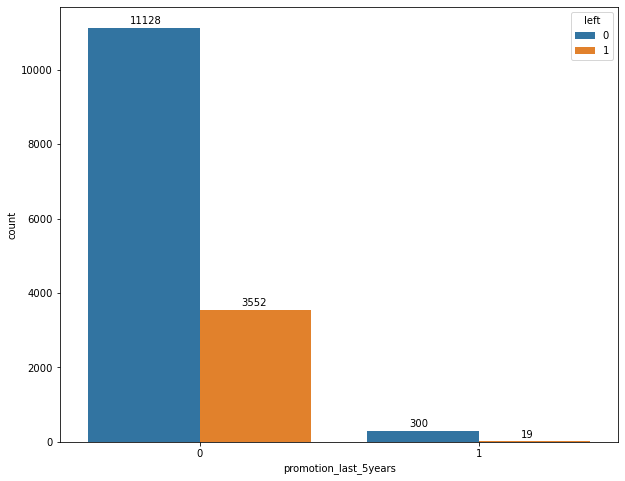

In [11]:
plt.figure(figsize=(10,8))
ax = sns.countplot(df.promotion_last_5years, hue = df.left)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()+100));

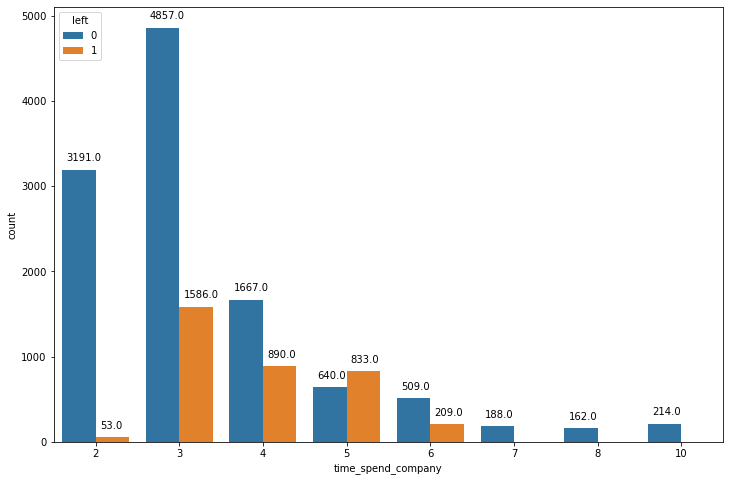

In [12]:
plt.figure(figsize=(12,8))
ax = sns.countplot(df.time_spend_company, hue = df.left)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.05, p.get_height()+100));

In [13]:
quartiles = df.quantile(q = [1/3, 2/3])
quartiles

satisfaction_level  last_evaluation  number_project  \
0.333333                0.52             0.61             3.0   
0.666667                0.76             0.82             4.0   

          average_montly_hours  time_spend_company  Work_accident  left  \
0.333333                 168.0                 3.0            0.0   0.0   
0.666667                 232.0                 4.0            0.0   0.0   

          promotion_last_5years  
0.333333                    0.0  
0.666667                    0.0

In [14]:
def workload(x, p,d):
    if x <= d[p][1/3]:
        return 1
    elif x <= d[p][2/3]:
        return 2
    else:
        return 3

In [15]:
d = df.average_montly_hours.apply(workload, args = ("average_montly_hours", quartiles))


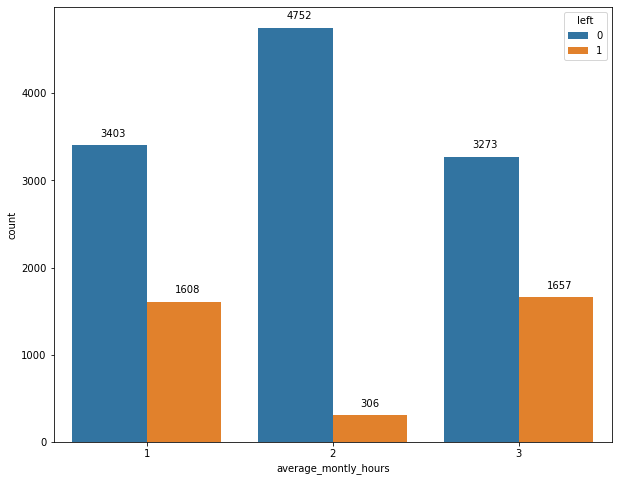

In [16]:
plt.figure(figsize=(10,8))
ax = sns.countplot(d, hue = df.left)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()+100));

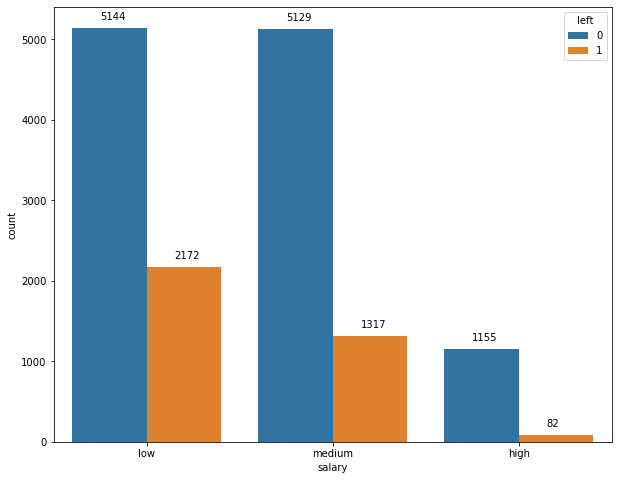

In [17]:
plt.figure(figsize=(10,8))
ax = sns.countplot(df.salary, hue = df.left)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()+100));

In [401]:
g = df.satisfaction_level.apply(workload, args = ("satisfaction_level", quartiles))

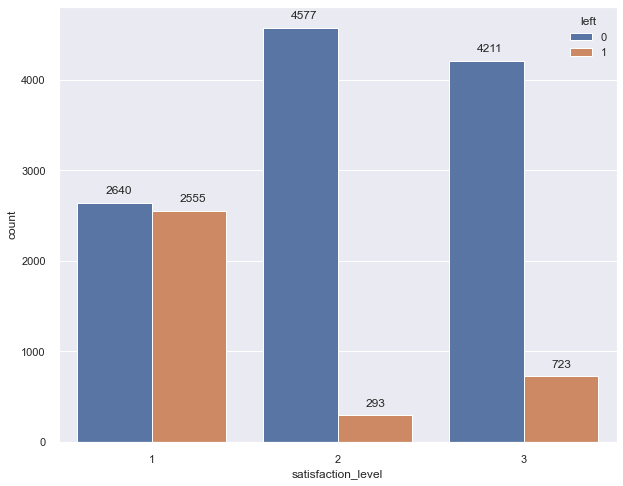

In [402]:
plt.figure(figsize=(10,8))
ax = sns.countplot(g, hue = df.left)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()+100));

### Employees Left

Let's check how many employees were left?
Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

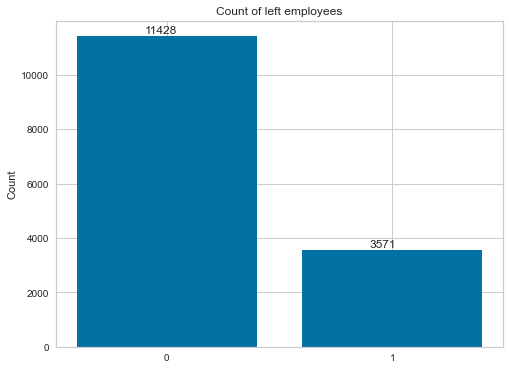

In [187]:

a = df.left.value_counts().index
b = df.left.value_counts().values

fig, ax = plt.subplots(figsize = (8,6))
y_pos = np.arange(len(a))
plt.bar(a, b, align='center')
plt.xticks(y_pos,a)
plt.ylabel('Count')
plt.title('Count of left employees')
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+100));

plt.show()

### Number of Projects

Similarly, you can also plot a bar graph to count the number of employees deployed on how many projects?

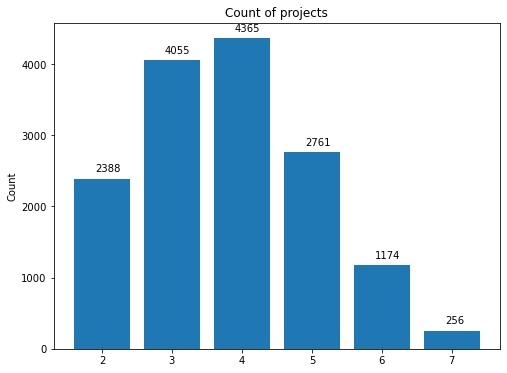

In [19]:
"""fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])
a = df.number_project.value_counts().index
b = df.number_project.value_counts().values
ax.bar(a,b)
plt.ylabel('Count')
plt.title('Count of project')
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+100));

plt.show()"""

a = df.number_project.value_counts().index
b = df.number_project.value_counts().values
fig, ax = plt.subplots(figsize = (8,6))

plt.bar(a, b, align='center')

plt.ylabel('Count')
plt.title('Count of projects')
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+100));

plt.show();

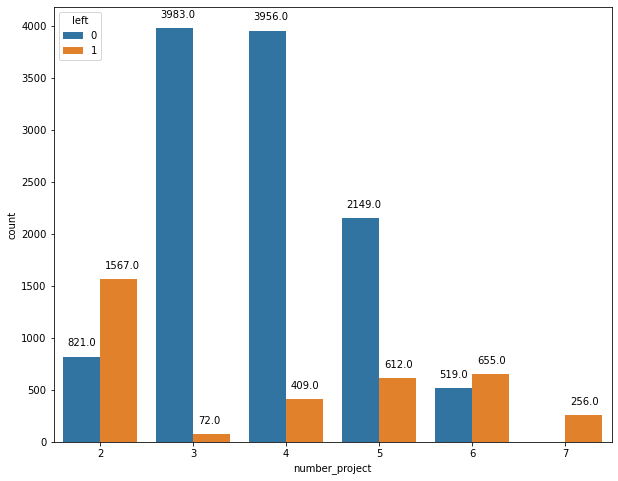

In [20]:
plt.figure(figsize=(10,8))
ax = sns.countplot(df.number_project, hue = df.left)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.05, p.get_height()+100));

### Time Spent in Company

Similarly, you can also plot a bar graph to count the number of employees have based on how much experience?


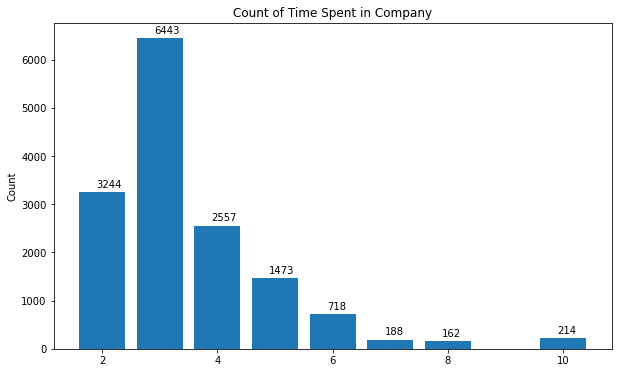

In [21]:

a = df.time_spend_company.value_counts().index
b = df.time_spend_company.value_counts().values
fig, ax = plt.subplots(figsize = (10,6))

plt.bar(a, b, align='center')

plt.ylabel('Count')
plt.title('Count of Time Spent in Company')
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+100));

plt.show();

### Subplots of Features

You can use the methods of the matplotlib.

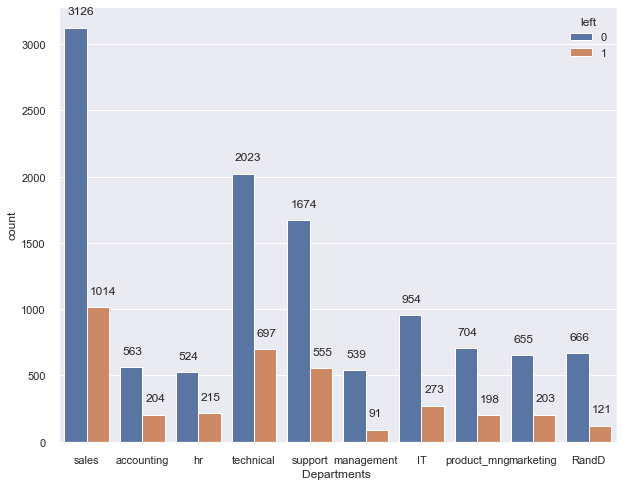

In [451]:
plt.figure(figsize=(10,8))
ax = sns.countplot(df["Departments "], hue = df.left)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.05, p.get_height()+100));

## 3. Data Pre-Processing

#### Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

    

#### Label Encoding

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.



In [22]:
df.salary = df.salary.map({"low":0, "medium":1, "high":2})

In [23]:
df.salary.head()

0    0
1    1
2    1
3    0
4    0
Name: salary, dtype: int64

## 4. Cluster Analysis

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

#### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

In [24]:
df = pd.get_dummies(df)
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  salary  \
0                   3              0     1                      0       0   
1                   6              0     1                      0       1   
2                   4              0     1                      0       1   
3                   5              0     1                      0       0   
4                   3              0     1                      0       0   

   Departments _IT  Departments _RandD  Departments _accounting  \
0                0                   0                        0   
1                0                   0                        0   
2                0                   0                        0   
3                0                   0                        0   
4                0                   0                        0   

   Departments _hr  Departments _management  Departments _marketing  \
0                0                        0                       0   
1                0                        0                       0   
2                0                        0                       0   
3                0                        0                       0   
4                0                        0                       0   

   Departments _product_mng  Departments _sales  Departments _support  \
0                         0                   1                     0   
1                         0                   1                     0   
2                         0                   1                     0   
3                         0                   1                     0   
4                         0                   1                     0   

   Departments _technical  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0

In [25]:
df2 = df.copy()

In [26]:
df.agg(["mean", "std"]).round()

satisfaction_level  last_evaluation  number_project  \
mean                 1.0              1.0             4.0   
std                  0.0              0.0             1.0   

      average_montly_hours  time_spend_company  Work_accident  left  \
mean                 201.0                 3.0            0.0   0.0   
std                   50.0                 1.0            0.0   0.0   

      promotion_last_5years  salary  Departments _IT  Departments _RandD  \
mean                    0.0     1.0              0.0                 0.0   
std                     0.0     1.0              0.0                 0.0   

      Departments _accounting  Departments _hr  Departments _management  \
mean                      0.0              0.0                      0.0   
std                       0.0              0.0                      0.0   

      Departments _marketing  Departments _product_mng  Departments _sales  \
mean                     0.0                       0.0                 0.0   
std                      0.0                       0.0                 0.0   

      Departments _support  Departments _technical  
mean                   0.0                     0.0  
std                    0.0                     0.0

In [27]:
df[["number_project","average_montly_hours", "time_spend_company"]] = df[["number_project","average_montly_hours", "time_spend_company"]].apply(np.log, axis = 1).round(3)


In [28]:
df.agg(["mean", "std"]).round()

satisfaction_level  last_evaluation  number_project  \
mean                 1.0              1.0             1.0   
std                  0.0              0.0             0.0   

      average_montly_hours  time_spend_company  Work_accident  left  \
mean                   5.0                 1.0            0.0   0.0   
std                    0.0                 0.0            0.0   0.0   

      promotion_last_5years  salary  Departments _IT  Departments _RandD  \
mean                    0.0     1.0              0.0                 0.0   
std                     0.0     1.0              0.0                 0.0   

      Departments _accounting  Departments _hr  Departments _management  \
mean                      0.0              0.0                      0.0   
std                       0.0              0.0                      0.0   

      Departments _marketing  Departments _product_mng  Departments _sales  \
mean                     0.0                       0.0                 0.0   
std                      0.0                       0.0                 0.0   

      Departments _support  Departments _technical  
mean                   0.0                     0.0  
std                    0.0                     0.0

In [29]:
X = df.drop("left", axis=1)
y = df["left"]

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# transform into a dataframe
X_scaled = pd.DataFrame(X_scaled, index = X.index, columns = X.columns)
X_scaled.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0           -0.936495        -1.087275       -1.732334             -0.830090   
1            0.752814         0.840707        0.968807              1.146787   
2           -2.022479         0.957554        1.962567              1.293508   
3            0.431041         0.899131        0.968807              0.525152   
4           -0.976716        -1.145699       -1.732334             -0.779896   

   time_spend_company  Work_accident  promotion_last_5years    salary  \
0           -0.228275      -0.411165              -0.147412 -0.933368   
1            1.683311      -0.411165              -0.147412  0.636092   
2            0.563392      -0.411165              -0.147412  0.636092   
3            1.178520      -0.411165              -0.147412 -0.933368   
4           -0.228275      -0.411165              -0.147412 -0.933368   

   Departments _IT  Departments _RandD  Departments _accounting  \
0        -0.298486           -0.235321                -0.232148   
1        -0.298486           -0.235321                -0.232148   
2        -0.298486           -0.235321                -0.232148   
3        -0.298486           -0.235321                -0.232148   
4        -0.298486           -0.235321                -0.232148   

   Departments _hr  Departments _management  Departments _marketing  \
0        -0.227647                -0.209391               -0.246322   
1        -0.227647                -0.209391               -0.246322   
2        -0.227647                -0.209391               -0.246322   
3        -0.227647                -0.209391               -0.246322   
4        -0.227647                -0.209391               -0.246322   

   Departments _product_mng  Departments _sales  Departments _support  \
0                 -0.252953            1.619551             -0.417791   
1                 -0.252953            1.619551             -0.417791   
2                 -0.252953            1.619551             -0.417791   
3                 -0.252953            1.619551             -0.417791   
4                 -0.252953            1.619551             -0.417791   

   Departments _technical  
0               -0.470655  
1               -0.470655  
2               -0.470655  
3               -0.470655  
4               -0.470655

In [31]:
X_scaled.agg(["mean", "std"]).round()

satisfaction_level  last_evaluation  number_project  \
mean                -0.0             -0.0            -0.0   
std                  1.0              1.0             1.0   

      average_montly_hours  time_spend_company  Work_accident  \
mean                  -0.0                 0.0            0.0   
std                    1.0                 1.0            1.0   

      promotion_last_5years  salary  Departments _IT  Departments _RandD  \
mean                    0.0     0.0              0.0                -0.0   
std                     1.0     1.0              1.0                 1.0   

      Departments _accounting  Departments _hr  Departments _management  \
mean                      0.0             -0.0                     -0.0   
std                       1.0              1.0                      1.0   

      Departments _marketing  Departments _product_mng  Departments _sales  \
mean                     0.0                       0.0                 0.0   
std                      1.0                       1.0                 1.0   

      Departments _support  Departments _technical  
mean                   0.0                     0.0  
std                    1.0                     1.0

In [32]:
from sklearn.cluster import KMeans

In [33]:
ssd = []
K = range(2,15)
for k in K:
    kmeans = KMeans(n_clusters = k).fit((X_scaled))
    ssd.append(kmeans.inertia_)

Text(0.5, 1.0, 'Inertia')

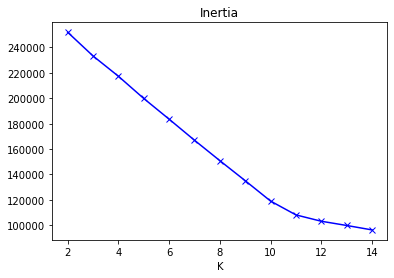

In [34]:
plt.plot(K, ssd, "bx-")
plt.xlabel("K")
plt.title("Inertia")

In [35]:
from yellowbrick.cluster import KElbowVisualizer

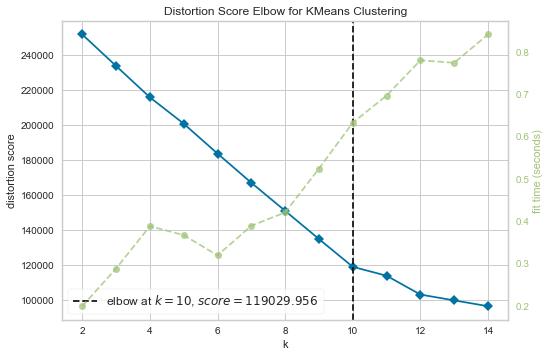

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,15))
visu.fit(X_scaled)
visu.poof()

In [37]:
kmeans = KMeans(n_clusters = 10).fit(X_scaled)

In [38]:
labels = kmeans.labels_

In [39]:
X_scaled.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0           -0.936495        -1.087275       -1.732334             -0.830090   
1            0.752814         0.840707        0.968807              1.146787   
2           -2.022479         0.957554        1.962567              1.293508   
3            0.431041         0.899131        0.968807              0.525152   
4           -0.976716        -1.145699       -1.732334             -0.779896   

   time_spend_company  Work_accident  promotion_last_5years    salary  \
0           -0.228275      -0.411165              -0.147412 -0.933368   
1            1.683311      -0.411165              -0.147412  0.636092   
2            0.563392      -0.411165              -0.147412  0.636092   
3            1.178520      -0.411165              -0.147412 -0.933368   
4           -0.228275      -0.411165              -0.147412 -0.933368   

   Departments _IT  Departments _RandD  Departments _accounting  \
0        -0.298486           -0.235321                -0.232148   
1        -0.298486           -0.235321                -0.232148   
2        -0.298486           -0.235321                -0.232148   
3        -0.298486           -0.235321                -0.232148   
4        -0.298486           -0.235321                -0.232148   

   Departments _hr  Departments _management  Departments _marketing  \
0        -0.227647                -0.209391               -0.246322   
1        -0.227647                -0.209391               -0.246322   
2        -0.227647                -0.209391               -0.246322   
3        -0.227647                -0.209391               -0.246322   
4        -0.227647                -0.209391               -0.246322   

   Departments _product_mng  Departments _sales  Departments _support  \
0                 -0.252953            1.619551             -0.417791   
1                 -0.252953            1.619551             -0.417791   
2                 -0.252953            1.619551             -0.417791   
3                 -0.252953            1.619551             -0.417791   
4                 -0.252953            1.619551             -0.417791   

   Departments _technical  
0               -0.470655  
1               -0.470655  
2               -0.470655  
3               -0.470655  
4               -0.470655

In [40]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,12,13]

for num_clusters in range_n_clusters:
    
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X_scaled)
    
    cluster_labels = kmeans.labels_
    
    
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.05428349853891895
For n_clusters=3, the silhouette score is 0.08820771578494238
For n_clusters=4, the silhouette score is 0.11762299163528264
For n_clusters=5, the silhouette score is 0.16415663536710506
For n_clusters=6, the silhouette score is 0.19855345234585745
For n_clusters=7, the silhouette score is 0.2350088657530803
For n_clusters=8, the silhouette score is 0.2721115144391611
For n_clusters=9, the silhouette score is 0.2995262018379818
For n_clusters=10, the silhouette score is 0.33032592531796157
For n_clusters=11, the silhouette score is 0.3398303840634437
For n_clusters=12, the silhouette score is 0.2888045740178755
For n_clusters=13, the silhouette score is 0.2784153475150431


In [48]:
kmeans = KMeans(n_clusters = 2).fit(X_scaled)

In [49]:
labels = kmeans.labels_

In [50]:
pd.DataFrame(labels).value_counts()

0    10859
1     4140
dtype: int64

In [190]:
df5 = df[["left"]]

In [191]:
df5["label"] = labels

In [192]:
df5.head()

left  label
0     1      1
1     1      1
2     1      1
3     1      1
4     1      1

In [193]:
df5.groupby(["left"]).count()

label
left       
0     11428
1      3571

In [194]:
df5.groupby(["label"]).count()

left
label       
0      10859
1       4140

In [195]:
a = df5[df5["left"]==0]
a.head()

left  label
2000     0      1
2001     0      1
2002     0      1
2003     0      1
2004     0      1

In [273]:
b = df5[df5["left"]==1]
b.head()

left  label
0     1      1
1     1      1
2     1      1
3     1      1
4     1      1

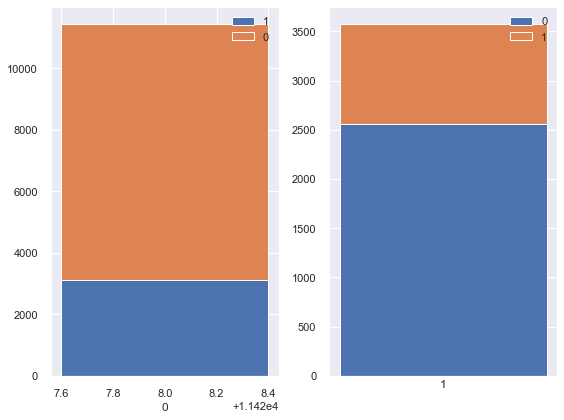

In [274]:
fig,ax=plt.subplots(1,2, figsize=(8,6))
plt.xticks(np.arange(2), (0,1))
ax[0].bar(a.label.count(), a.label.count()-a[a.label==0].label.count(), label="1")
ax[0].bar(a.label.count(), a[a.label==0].label.count(), bottom= a.label.count()- a[a.label==0].label.count(), label="0")
ax[0].legend(loc="best")
ax[0].set_xlabel(0)


ax[1].bar(b.label.count(), b.label.count()-b[b.label==1].label.count(), label="0")
ax[1].bar(b.label.count(), b[b.label==1].label.count(), bottom = b.label.count()-b[b.label==1].label.count(), label="1")
ax[1].legend(loc="best")
ax[1].set_xlabel(1)

plt.tight_layout()

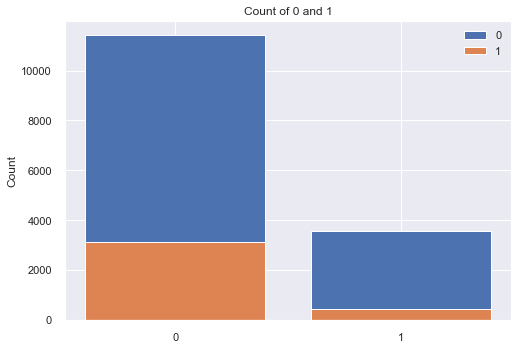

In [249]:
list1= [a.label.count(), b.label.count()]
list2= [a.label.count()-a[a.label==0].label.count(), b.label.count()-a[a.label==1].label.count()]
p1 = plt.bar(np.arange(2), list1, label="1")
p2 = plt.bar(np.arange(2), list2, label= "0")

plt.ylabel('Count')
plt.title('Count of 0 and 1')
plt.xticks(np.arange(2), (0,1))

plt.legend((p1[0], p2[0]), (0, 1))

plt.show()

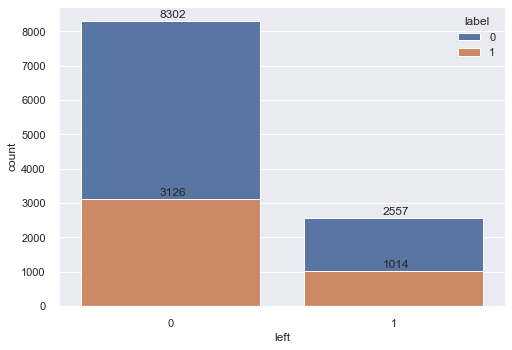

In [397]:
ax = sns.countplot(df5.left, hue= df5.label, dodge=False, orient= "v")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+100));

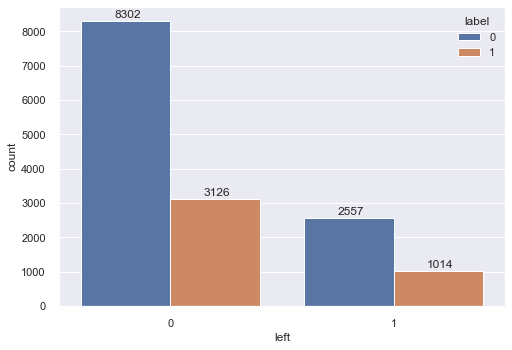

In [394]:
ax = sns.countplot(df5.left, hue= df5.label)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()+100));

## 5. Model Building

### Split Data as Train and Test Set

Here, Dataset is broken into two parts in ratio of 70:30. It means 70% data will used for model training and 30% for model testing.

In [62]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [63]:
X = df2.drop("left", axis=1)
y = df2["left"]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state=42)

### #Gradient Boosting Classifier

#### Model Building

In [65]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.5, n_estimators = 200, max_depth= 9)
gb_model = gradient_booster.fit(X_train,y_train)

In [66]:
y_pred = gb_model.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3429
           1       0.99      0.97      0.98      1071

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



#### Evaluating Model Performance

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

In [67]:
confusion_matrix(y_test, y_pred)

array([[3418,   11],
       [  34, 1037]], dtype=int64)

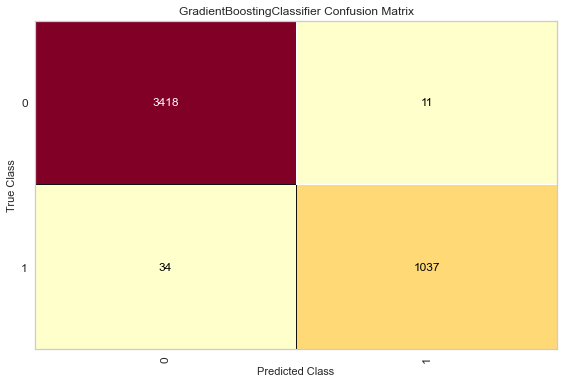

<AxesSubplot:title={'center':'GradientBoostingClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [68]:
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(gb_model, classes=y_test.unique())

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()

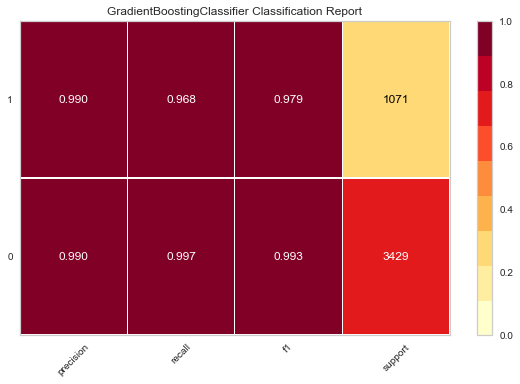

<AxesSubplot:title={'center':'GradientBoostingClassifier Classification Report'}>

In [69]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
visualizer = ClassificationReport(gb_model, support=True)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure        

In [398]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, average='weighted', labels=[0]),
                 'recall-0': make_scorer(recall_score, average='weighted', labels = [0]),
                 'f1-0': make_scorer(f1_score, average='weighted', labels = [0]),
                 'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
                 'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
                 'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
                 }

for i, j in custom_scorer.items():
    scores = cross_val_score(gb_model, X_train, y_train, cv = 10, scoring = j).mean()
    print(f" {i} score for gb_model : {scores}\n")

 accuracy score for gb_model : 0.9886659403513551

 precision-0 score for gb_model : 0.9894553748957107

 recall-0 score for gb_model : 0.9959996871088862

 f1-0 score for gb_model : 0.9931494235677389

 precision-1 score for gb_model : 0.9885968600804519

 recall-1 score for gb_model : 0.966

 f1-1 score for gb_model : 0.9773475096393245



In [249]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, average='weighted', labels=[0]),
                 'recall-0': make_scorer(recall_score, average='weighted', labels = [0]),
                 'f1-0': make_scorer(f1_score, average='weighted', labels = [0]),
                 'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
                 'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
                 'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
                 }

for i, j in custom_scorer.items():
    scores = cross_val_score(gb_model, X_test, y_test, cv = 10, scoring = j).mean()
    print(f" {i} score for gb_model : {scores}\n")

 accuracy score for gb_model : 0.9833333333333334

 precision-0 score for gb_model : 0.9819465342677336

 recall-0 score for gb_model : 0.996790445501509

 f1-0 score for gb_model : 0.9890108649982373

 precision-1 score for gb_model : 0.9902303785185056

 recall-1 score for gb_model : 0.9393215645552095

 f1-1 score for gb_model : 0.9630781658446598



#### Prediction

In [71]:
my_dict = {
    'satisfaction_level':0.25,
    'last_evaluation': 0.80,
    'number_project': 5,
    'average_montly_hours': 250,
    'time_spend_company': 5,
    'Work_accident': 1,
    'promotion_last_5years': 1,
    'salary': "medium",
    'Departments ': 'sales'
    
}

In [72]:
if my_dict["salary"] == "low":
    my_dict["salary"] = 0
elif my_dict["salary"] == "medium":
    my_dict["salary"] = 1
else:
    my_dict["salary"] = 2

df3 = pd.DataFrame.from_dict([my_dict])
df3

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.25              0.8               5                   250   

   time_spend_company  Work_accident  promotion_last_5years  salary  \
0                   5              1                      1       1   

  Departments   
0        sales

In [73]:
columns = list(X.columns)
columns

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'salary',
 'Departments _IT',
 'Departments _RandD',
 'Departments _accounting',
 'Departments _hr',
 'Departments _management',
 'Departments _marketing',
 'Departments _product_mng',
 'Departments _sales',
 'Departments _support',
 'Departments _technical']

In [74]:
df3 = pd.get_dummies(df3).reindex(columns=columns, fill_value=0)

In [75]:
df3

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.25              0.8               5                   250   

   time_spend_company  Work_accident  promotion_last_5years  salary  \
0                   5              1                      1       1   

   Departments _IT  Departments _RandD  Departments _accounting  \
0                0                   0                        0   

   Departments _hr  Departments _management  Departments _marketing  \
0                0                        0                       0   

   Departments _product_mng  Departments _sales  Departments _support  \
0                         0                   1                     0   

   Departments _technical  
0                       0

### #KNeighbors Classifier

#### Model Building

In [82]:
c = df1.drop("left", axis =1)._get_numeric_data()
c["salary"] = X.salary
c

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53           0.693   
1                    0.80             0.86           1.609   
2                    0.11             0.88           1.946   
3                    0.72             0.87           1.609   
4                    0.37             0.52           0.693   
...                   ...              ...             ...   
14994                0.40             0.57           0.693   
14995                0.37             0.48           0.693   
14996                0.37             0.53           0.693   
14997                0.11             0.96           1.792   
14998                0.37             0.52           0.693   

       average_montly_hours  time_spend_company  Work_accident  \
0                     5.056               1.099              0   
1                     5.568               1.792              0   
2                     5.606               1.386              0   
3                     5.407               1.609              0   
4                     5.069               1.099              0   
...                     ...                 ...            ...   
14994                 5.017               1.099              0   
14995                 5.075               1.099              0   
14996                 4.963               1.099              0   
14997                 5.635               1.386              0   
14998                 5.063               1.099              0   

       promotion_last_5years  salary  Departments _IT  Departments _RandD  \
0                          0       0                0                   0   
1                          0       1                0                   0   
2                          0       1                0                   0   
3                          0       0                0                   0   
4                          0       0                0                   0   
...                      ...     ...              ...                 ...   
14994                      0       0                0                   0   
14995                      0       0                0                   0   
14996                      0       0                0                   0   
14997                      0       0                0                   0   
14998                      0       0                0                   0   

       Departments _accounting  Departments _hr  Departments _management  \
0                            0                0                        0   
1                            0                0                        0   
2                            0                0                        0   
3                            0                0                        0   
4                            0                0                        0   
...                        ...              ...                      ...   
14994                        0                0                        0   
14995                        0                0                        0   
14996                        0                0                        0   
14997                        0                0                        0   
14998                        0                0                        0   

       Departments _marketing  Departments _product_mng  Departments _sales  \
0                           0                         0                   1   
1                           0                         0                   1   
2                           0                         0                   1   
3                           0                         0                   1   
4                           0                         0                   1   
...                       ...                       ...                 ...   
14994                       0                         0                   0   

In [83]:
#b = a.join(X.iloc[:,8:])
#b.head()

In [85]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(c)
df_scaled = pd.DataFrame(scaled_x,columns=X.columns)
df_scaled.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0           -0.936495        -1.087275       -1.732334             -0.830090   
1            0.752814         0.840707        0.968807              1.146787   
2           -2.022479         0.957554        1.962567              1.293508   
3            0.431041         0.899131        0.968807              0.525152   
4           -0.976716        -1.145699       -1.732334             -0.779896   

   time_spend_company  Work_accident  promotion_last_5years    salary  \
0           -0.228275      -0.411165              -0.147412 -0.933368   
1            1.683311      -0.411165              -0.147412  0.636092   
2            0.563392      -0.411165              -0.147412  0.636092   
3            1.178520      -0.411165              -0.147412 -0.933368   
4           -0.228275      -0.411165              -0.147412 -0.933368   

   Departments _IT  Departments _RandD  Departments _accounting  \
0        -0.298486           -0.235321                -0.232148   
1        -0.298486           -0.235321                -0.232148   
2        -0.298486           -0.235321                -0.232148   
3        -0.298486           -0.235321                -0.232148   
4        -0.298486           -0.235321                -0.232148   

   Departments _hr  Departments _management  Departments _marketing  \
0        -0.227647                -0.209391               -0.246322   
1        -0.227647                -0.209391               -0.246322   
2        -0.227647                -0.209391               -0.246322   
3        -0.227647                -0.209391               -0.246322   
4        -0.227647                -0.209391               -0.246322   

   Departments _product_mng  Departments _sales  Departments _support  \
0                 -0.252953            1.619551             -0.417791   
1                 -0.252953            1.619551             -0.417791   
2                 -0.252953            1.619551             -0.417791   
3                 -0.252953            1.619551             -0.417791   
4                 -0.252953            1.619551             -0.417791   

   Departments _technical  
0               -0.470655  
1               -0.470655  
2               -0.470655  
3               -0.470655  
4               -0.470655

In [86]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

Maximum accuracy:- 0.9531111111111111 at K = 0


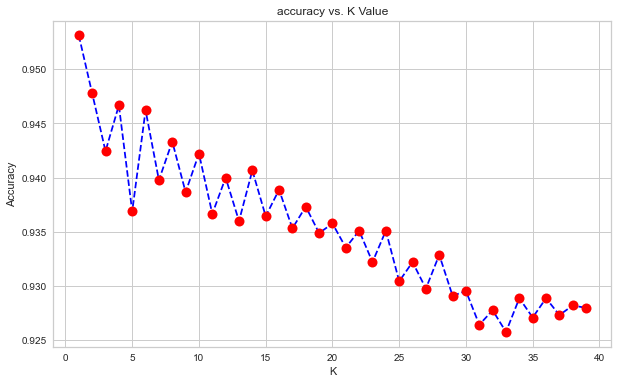

In [87]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [88]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size = 0.3, stratify = y, random_state=42)

In [89]:
knn_model = KNeighborsClassifier(n_neighbors = 1)

In [90]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [91]:
y_pred = knn_model.predict(X_test)

#### Evaluating Model Performance

In [92]:
cnf_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[3297  132]
 [  48 1023]]


              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3429
           1       0.89      0.96      0.92      1071

    accuracy                           0.96      4500
   macro avg       0.94      0.96      0.95      4500
weighted avg       0.96      0.96      0.96      4500



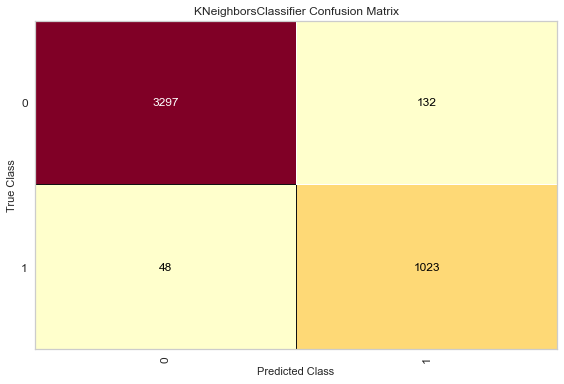

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [93]:
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(knn_model, classes=y_test.unique())

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()

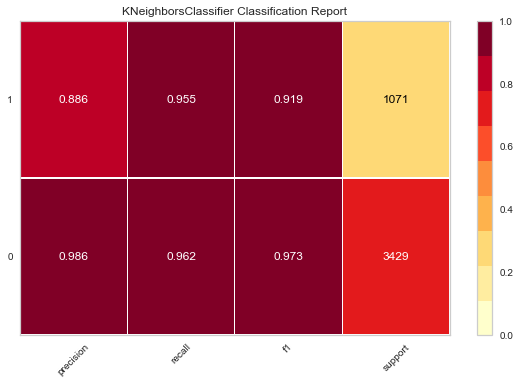

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [94]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
visualizer = ClassificationReport(knn_model, support=True)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure        

#### Prediction

In [362]:
f = df2.drop("left", axis=1)
f.head()

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  \
0                       157                   3              0   
1                       262                   6              0   
2                       272                   4              0   
3                       223                   5              0   
4                       159                   3              0   
...                     ...                 ...            ...   
14994                   151                   3              0   
14995                   160                   3              0   
14996                   143                   3              0   
14997                   280                   4              0   
14998                   158                   3              0   

       promotion_last_5years  salary  Departments _IT  Departments _RandD  \
0                          0       0                0                   0   
1                          0       1                0                   0   
2                          0       1                0                   0   
3                          0       0                0                   0   
4                          0       0                0                   0   
...                      ...     ...              ...                 ...   
14994                      0       0                0                   0   
14995                      0       0                0                   0   
14996                      0       0                0                   0   
14997                      0       0                0                   0   
14998                      0       0                0                   0   

       Departments _accounting  Departments _hr  Departments _management  \
0                            0                0                        0   
1                            0                0                        0   
2                            0                0                        0   
3                            0                0                        0   
4                            0                0                        0   
...                        ...              ...                      ...   
14994                        0                0                        0   
14995                        0                0                        0   
14996                        0                0                        0   
14997                        0                0                        0   
14998                        0                0                        0   

       Departments _marketing  Departments _product_mng  Departments _sales  \
0                           0                         0                   1   
1                           0                         0                   1   
2                           0                         0                   1   
3                           0                         0                   1   
4                           0                         0                   1   
...                       ...                       ...                 ...   
14994                       0                         0                   0   

In [ ]:
"""scaler = StandardScaler()
scaled_x = scaler.fit_transform(f)
df_scaled = pd.DataFrame(scaled_x,columns=X.columns)
df_scaled.head()"""

In [381]:
sc = scaler.fit(f)
pd.DataFrame(sc.transform(f), columns=f.columns).head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0           -0.936495        -1.087275       -1.462863             -0.882040   
1            0.752814         0.840707        0.971113              1.220423   
2           -2.022479         0.957554        2.593763              1.420657   
3            0.431041         0.899131        0.971113              0.439508   
4           -0.976716        -1.145699       -1.462863             -0.841993   

   time_spend_company  Work_accident  promotion_last_5years    salary  \
0           -0.341235      -0.411165              -0.147412 -0.933368   
1            1.713436      -0.411165              -0.147412  0.636092   
2            0.343655      -0.411165              -0.147412  0.636092   
3            1.028546      -0.411165              -0.147412 -0.933368   
4           -0.341235      -0.411165              -0.147412 -0.933368   

   Departments _IT  Departments _RandD  Departments _accounting  \
0        -0.298486           -0.235321                -0.232148   
1        -0.298486           -0.235321                -0.232148   
2        -0.298486           -0.235321                -0.232148   
3        -0.298486           -0.235321                -0.232148   
4        -0.298486           -0.235321                -0.232148   

   Departments _hr  Departments _management  Departments _marketing  \
0        -0.227647                -0.209391               -0.246322   
1        -0.227647                -0.209391               -0.246322   
2        -0.227647                -0.209391               -0.246322   
3        -0.227647                -0.209391               -0.246322   
4        -0.227647                -0.209391               -0.246322   

   Departments _product_mng  Departments _sales  Departments _support  \
0                 -0.252953            1.619551             -0.417791   
1                 -0.252953            1.619551             -0.417791   
2                 -0.252953            1.619551             -0.417791   
3                 -0.252953            1.619551             -0.417791   
4                 -0.252953            1.619551             -0.417791   

   Departments _technical  
0               -0.470655  
1               -0.470655  
2               -0.470655  
3               -0.470655  
4               -0.470655

In [443]:
my_dict = {
    'satisfaction_level':0.38,
    'last_evaluation': 0.53,
    'number_project': 2,
    'average_montly_hours': 157,
    'time_spend_company': 3,
    'Work_accident': 0,
    'promotion_last_5years': 0,
    'salary': 0,
    'Departments ': 'sales'
    
}

df3 = pd.DataFrame.from_dict([my_dict])
df3

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   

   time_spend_company  Work_accident  promotion_last_5years  salary  \
0                   3              0                      0       0   

  Departments   
0        sales

In [444]:
columns = list(X.columns)
columns

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'salary',
 'Departments _IT',
 'Departments _RandD',
 'Departments _accounting',
 'Departments _hr',
 'Departments _management',
 'Departments _marketing',
 'Departments _product_mng',
 'Departments _sales',
 'Departments _support',
 'Departments _technical']

In [369]:
"""for i in df_scaled.iloc[:,:8]:
    if i == "salary" and my_dict[i] == "low":
        my_dict[i] = 0
        my_dict[i] = (my_dict[i]-df2[i].mean())/df2[i].std()
    elif i == "salary" and my_dict[i] == "medium":
        my_dict[i] = 1
        my_dict[i] = (my_dict[i]-df2[i].mean())/df2[i].std()
    elif i == "salary" and my_dict[i] == "high":
        my_dict[i] = 2
        my_dict[i] = (my_dict[i]-df2[i].mean())/df2[i].std()
    else:
        my_dict[i] = (my_dict[i]-df2[i].mean())/df2[i].std()"""

In [445]:
df_sample = pd.DataFrame.from_dict([my_dict])
df_sample.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   

   time_spend_company  Work_accident  promotion_last_5years  salary  \
0                   3              0                      0       0   

  Departments   
0        sales

In [446]:
df_sample = pd.get_dummies(df_sample).reindex(columns=columns, fill_value=0)
df_sample

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   

   time_spend_company  Work_accident  promotion_last_5years  salary  \
0                   3              0                      0       0   

   Departments _IT  Departments _RandD  Departments _accounting  \
0                0                   0                        0   

   Departments _hr  Departments _management  Departments _marketing  \
0                0                        0                       0   

   Departments _product_mng  Departments _sales  Departments _support  \
0                         0                   1                     0   

   Departments _technical  
0                       0

In [447]:
sc.transform(df_sample)

array([[-0.93649469, -1.08727529, -1.46286291, -0.88203988, -0.34123516,
        -0.41116529, -0.14741182, -0.93336794, -0.29848587, -0.2353205 ,
        -0.23214788, -0.22764728, -0.20939051, -0.24632222, -0.25295305,
         1.61955144, -0.41779149, -0.4706553 ]])

In [448]:
df_sample = pd.DataFrame(sc.transform(df_sample), columns=df_sample.columns)
df_sample

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0           -0.936495        -1.087275       -1.462863              -0.88204   

   time_spend_company  Work_accident  promotion_last_5years    salary  \
0           -0.341235      -0.411165              -0.147412 -0.933368   

   Departments _IT  Departments _RandD  Departments _accounting  \
0        -0.298486           -0.235321                -0.232148   

   Departments _hr  Departments _management  Departments _marketing  \
0        -0.227647                -0.209391               -0.246322   

   Departments _product_mng  Departments _sales  Departments _support  \
0                 -0.252953            1.619551             -0.417791   

   Departments _technical  
0               -0.470655

In [360]:
-0.936495	-1.087275	-1.462863	-0.882040	-0.341235	-0.411165	-0.147412	-0.933368	-0.298486	-0.235321	-0.232148	-0.227647	-0.209391	-0.246322	-0.252953	1.619551	-0.417791	-0.470655

10.9683366

In [449]:
prediction = knn_model.predict(df_sample)
print(prediction)

[1]


### #Random Forest Classifier

#### Model Building

In [111]:
X = df2.drop("left", axis=1)
y = df2["left"]

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state=42)

In [113]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [114]:
cnf_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[3297  132]
 [  48 1023]]


              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3429
           1       0.89      0.96      0.92      1071

    accuracy                           0.96      4500
   macro avg       0.94      0.96      0.95      4500
weighted avg       0.96      0.96      0.96      4500



**RF Tuning**

In [115]:
rf = RandomForestClassifier()

In [161]:
rf_params = {"n_estimators" : [50, 100, 300],
             "max_depth" : [15,17,19],
             "max_features" : [10,12,14,16],
             "min_samples_split" : [2,4,6]
}

In [162]:
rf_cv_model = GridSearchCV(rf, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  5.2min finished


In [163]:
rf_cv_model.best_params_

{'max_depth': 19,
 'max_features': 10,
 'min_samples_split': 2,
 'n_estimators': 100}

In [141]:
rf_tuned = RandomForestClassifier(max_depth = 19,
                                  max_features = 10,
                                  min_samples_split = 2,
                                  n_estimators = 100).fit(X_train, y_train)

In [142]:
y_pred = rf_tuned.predict(X_test)

In [143]:
cnf_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[3420    9]
 [  33 1038]]


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3429
           1       0.99      0.97      0.98      1071

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



In [119]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, average='weighted', labels=[0]),
                 'recall-0': make_scorer(recall_score, average='weighted', labels = [0]),
                 'f1-0': make_scorer(f1_score, average='weighted', labels = [0]),
                 'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
                 'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
                 'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
                 }

for i, j in custom_scorer.items():
    scores = cross_val_score(rf_tuned, X_train, y_train, cv = 10, scoring = j).mean()
    print(f" {i} score for gb_model : {scores}\n")

 accuracy score for gb_model : 0.9909516546370692

 precision-0 score for gb_model : 0.9899645949149407

 recall-0 score for gb_model : 0.997875

 f1-0 score for gb_model : 0.9937142059028771

 precision-1 score for gb_model : 0.9930800601842117

 recall-1 score for gb_model : 0.9671999999999998

 f1-1 score for gb_model : 0.9797391134693771



In [251]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, average='weighted', labels=[0]),
                 'recall-0': make_scorer(recall_score, average='weighted', labels = [0]),
                 'f1-0': make_scorer(f1_score, average='weighted', labels = [0]),
                 'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
                 'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
                 'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
                 }

for i, j in custom_scorer.items():
    scores = cross_val_score(rf_tuned, X_test, y_test, cv = 10, scoring = j).mean()
    print(f" {i} score for gb_model : {scores}\n")

 accuracy score for gb_model : 0.985111111111111

 precision-0 score for gb_model : 0.9828312641653743

 recall-0 score for gb_model : 0.9979574787308406

 f1-0 score for gb_model : 0.9906069483374174

 precision-1 score for gb_model : 0.9942212560901883

 recall-1 score for gb_model : 0.9439858082381447

 f1-1 score for gb_model : 0.9677828631217862



#### Evaluating Model Performance

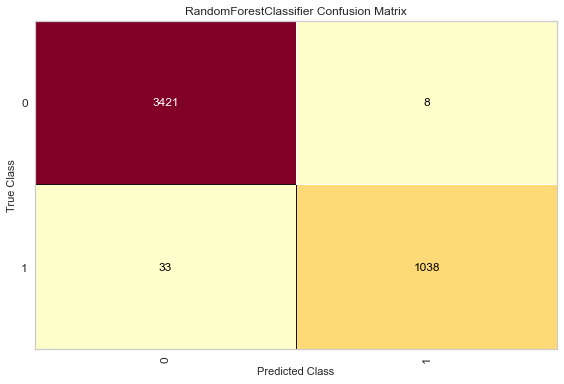

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [120]:
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(rf_tuned, classes=y_test.unique())

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()

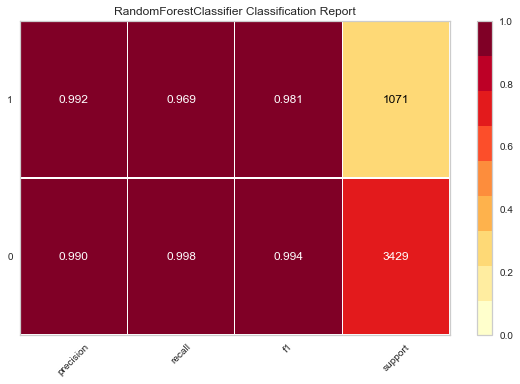

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [121]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
visualizer = ClassificationReport(rf_tuned, support=True)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure        

<AxesSubplot:>

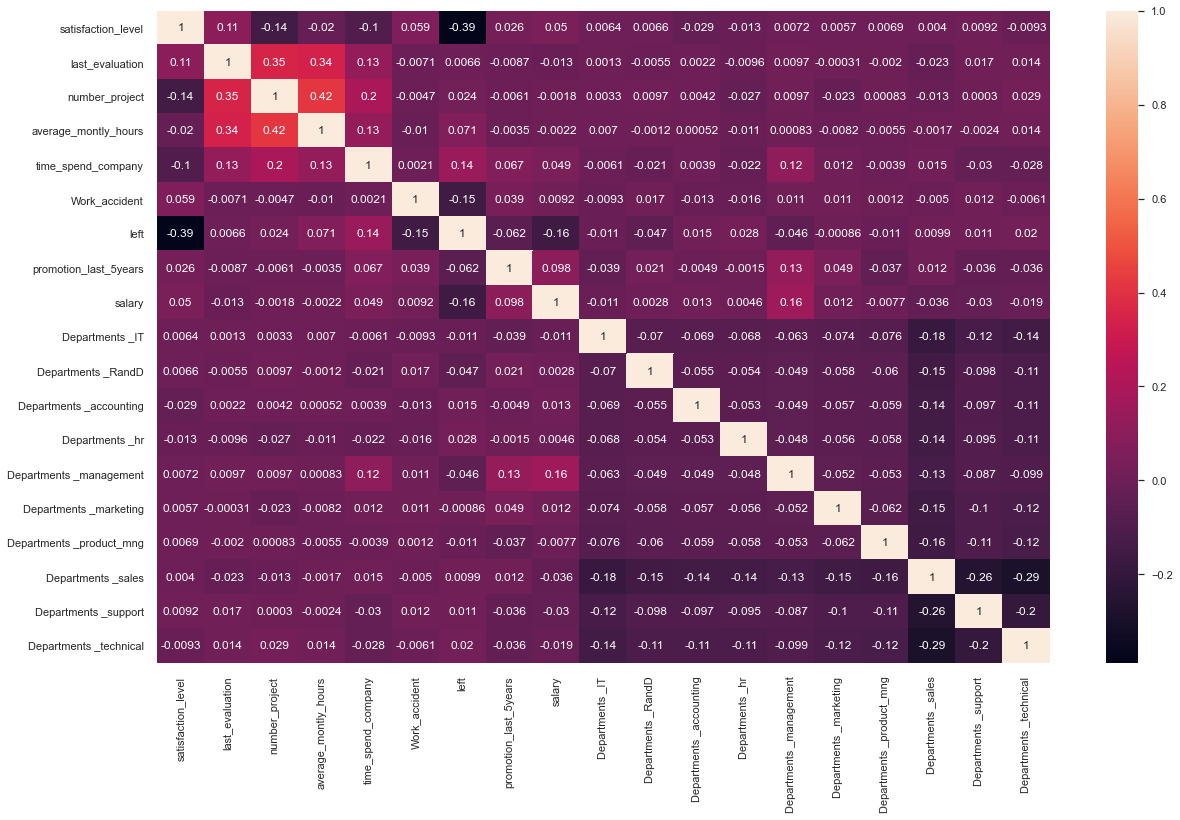

In [411]:
plt.figure(figsize= (20,12))
sns.heatmap(df2.corr(), annot = True)

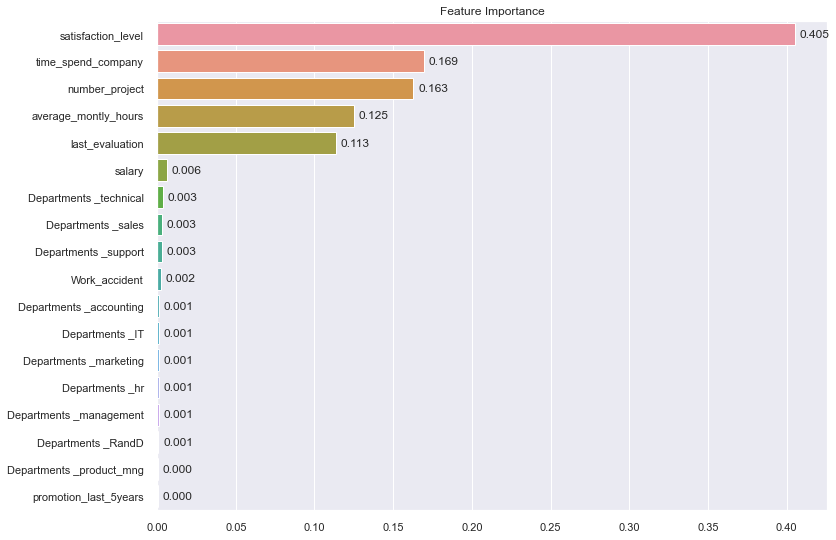

In [422]:
from sklearn.feature_selection import RFE
selector = RFE(rf_tuned, n_features_to_select=18, step=1,verbose=2)
selector = selector.fit(X, y)
selector.support_

features = []
for i in list(enumerate(selector.support_.tolist())):
    if i[1] == True:
        features.append(i[0])
features
X.columns[features]

feature_imp = pd.Series(rf_tuned.feature_importances_[features],
                        index=X.columns[features]).sort_values(ascending=False)
plt.figure(figsize=(12,9))
ax = sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")


for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
plt.show()

In [123]:
X.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  promotion_last_5years  salary  \
0                   3              0                      0       0   
1                   6              0                      0       1   
2                   4              0                      0       1   
3                   5              0                      0       0   
4                   3              0                      0       0   

   Departments _IT  Departments _RandD  Departments _accounting  \
0                0                   0                        0   
1                0                   0                        0   
2                0                   0                        0   
3                0                   0                        0   
4                0                   0                        0   

   Departments _hr  Departments _management  Departments _marketing  \
0                0                        0                       0   
1                0                        0                       0   
2                0                        0                       0   
3                0                        0                       0   
4                0                        0                       0   

   Departments _product_mng  Departments _sales  Departments _support  \
0                         0                   1                     0   
1                         0                   1                     0   
2                         0                   1                     0   
3                         0                   1                     0   
4                         0                   1                     0   

   Departments _technical  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0

In [124]:
X1 = X.copy()

In [125]:
X1 = X1[["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", "time_spend_company"]]

In [126]:
X1.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  
0                   3  
1                   6  
2                   4  
3                   5  
4                   3

In [127]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size = 0.3, stratify = y, random_state=42)

In [128]:
rf_tuned = RandomForestClassifier(max_depth = 16,
                                  max_features = 10,
                                  min_samples_split = 2,
                                  n_estimators = 100).fit(X_train1, y_train1)

In [129]:
y_pred = rf_tuned.predict(X_test1)

In [130]:
cnf_matrix = confusion_matrix(y_test1,y_pred)
print(confusion_matrix(y_test1,y_pred))
print('\n')
print(classification_report(y_test1,y_pred))

[[3408   21]
 [  35 1036]]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3429
           1       0.98      0.97      0.97      1071

    accuracy                           0.99      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



In [471]:
X2 =  X1[["last_evaluation", "number_project", "average_montly_hours", "time_spend_company"]]

In [472]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size = 0.3, stratify = y, random_state=42)

In [473]:
rf_tuned2 = RandomForestClassifier().fit(X_train2, y_train2)

In [474]:
y_pred2 = rf_tuned2.predict(X_test2)

In [475]:
cnf_matrix = confusion_matrix(y_test2,y_pred2)
print(confusion_matrix(y_test2,y_pred2))
print('\n')
print(classification_report(y_test2,y_pred2))

[[3388   41]
 [  44 1027]]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3429
           1       0.96      0.96      0.96      1071

    accuracy                           0.98      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



In [476]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, average='weighted', labels=[0]),
                 'recall-0': make_scorer(recall_score, average='weighted', labels = [0]),
                 'f1-0': make_scorer(f1_score, average='weighted', labels = [0]),
                 'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
                 'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
                 'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
                 }

for i, j in custom_scorer.items():
    scores = cross_val_score(rf_tuned2, X_train2, y_train2, cv = 10, scoring = j).mean()
    print(f" {i} score for gb_model : {scores}\n")

 accuracy score for gb_model : 0.9799982750011349

 precision-0 score for gb_model : 0.9870237688767585

 recall-0 score for gb_model : 0.9872485919899875

 f1-0 score for gb_model : 0.9869352631263537

 precision-1 score for gb_model : 0.9588789526462456

 recall-1 score for gb_model : 0.9583999999999999

 f1-1 score for gb_model : 0.9579129931669008



#### Prediction

In [144]:
my_dict = {
    'satisfaction_level':0.25,
    'last_evaluation': 0.80,
    'number_project': 5,
    'average_montly_hours': 250,
    'time_spend_company': 5,
    'Work_accident': 1,
    'promotion_last_5years': 1,
    'salary': "medium",
    'Departments ': 'sales'
    
}


In [145]:
if my_dict["salary"] == "low":
    my_dict["salary"] = 0
elif my_dict["salary"] == "medium":
    my_dict["salary"] = 1
else:
    my_dict["salary"] = 2

df3 = pd.DataFrame.from_dict([my_dict])
df3

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.25              0.8               5                   250   

   time_spend_company  Work_accident  promotion_last_5years  salary  \
0                   5              1                      1       1   

  Departments   
0        sales

In [146]:
df3 = pd.get_dummies(df3).reindex(columns=columns, fill_value=0)
df3

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.25              0.8               5                   250   

   time_spend_company  Work_accident  promotion_last_5years  salary  \
0                   5              1                      1       1   

   Departments _IT  Departments _RandD  Departments _accounting  \
0                0                   0                        0   

   Departments _hr  Departments _management  Departments _marketing  \
0                0                        0                       0   

   Departments _product_mng  Departments _sales  Departments _support  \
0                         0                   1                     0   

   Departments _technical  
0                       0

In [147]:
prediction = rf_tuned.predict(df3)
print(prediction)

[0]


## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Model as .pkl

In [240]:
import pickle

In [477]:
rf_tuned = RandomForestClassifier().fit(X1, y)

In [478]:
pickle.dump(rf_tuned, open('rf_tuned_model.pkl', 'wb'))

<IPython.core.display.Javascript object>

### Save and Export Variables as .pkl

In [479]:
pickle.dump(X1.columns, open("features.pkl", "wb"))

<IPython.core.display.Javascript object>

In [480]:
pickle.dump(sc, open("scaler.pkl", "wb"))

<IPython.core.display.Javascript object>